In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from utils.hdf_utils import load_measurement_data
from utils.plot_utils import set_fontsize, plot_binned_datasets_laserscan
from utils.binning_utils import find_nearest_idx, combine_arrays_irregular, bin_data,\
                                average_binned_data, bin_datasets_laserscan

In [2]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

# Rotational Cooling Saturation Measurements 

rotational cooling (P2 F1) multipassed with two prisms and detection (R0 F1) double passed with a single prism.  

PMT is set to 1 kV, 2x factor 5 amplification stages on SRS amplifier, with 10 kHz lowpass filter.

## Scan R0 F1 (detection) with P2 F1 (rotational cooling) on

Measurement to check the detection transition is saturated by scanning the frequency, expect a flat top near the resonance if saturated.
The detection powers were kept constant between measurements, the rotational cooling power was varied.


| desc | value | 
|-----|-----|
|rot cooling pol type | square wave, cont. |
|rot cooling pol switch | 1.69 Mhz|
|detection pol type | resonant, cont. |
|detection pol switch | 1.562 MHz | 
|detection power | 27 mW |

In [3]:
fname = "saturation_P2F1.hdf"

dset_names_R0F1_scan = [
    "1582761939 continuous_scan_P2F1_saturation",
    "1582765892 saturation_continuous_scan_R0_F1_cooling_P2_F1"
]

powers_P2F1 = [
    "54 mW",
    '36.5 mW'
]

{'scan errorbar': (<Figure size 720x576 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2da9be71248>),
 'scan histogram': (<Figure size 720x576 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2da9be6eb88>)}

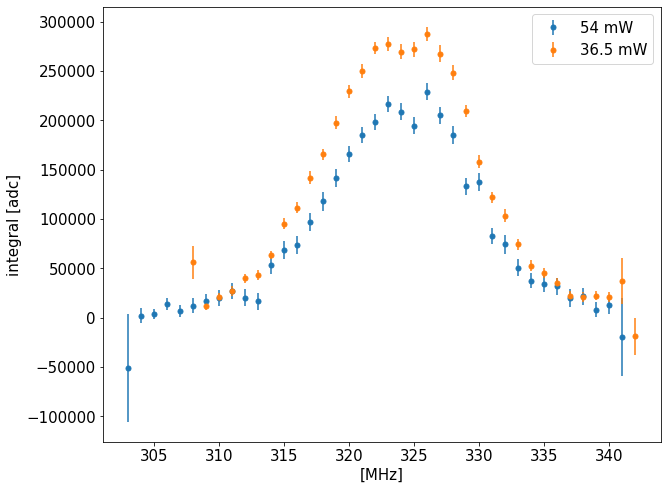

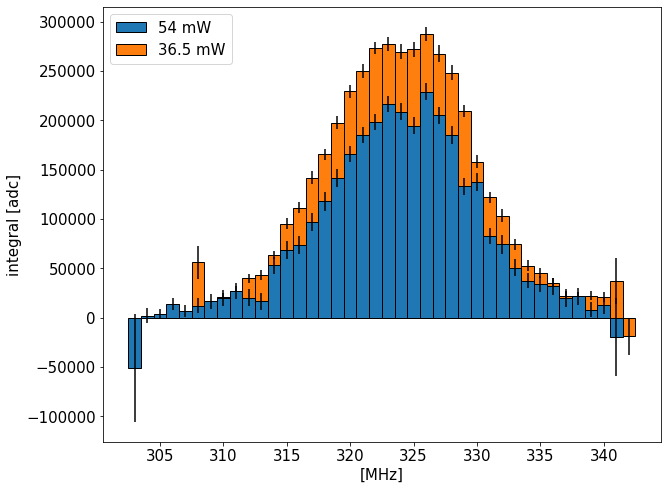

In [4]:
binned_integrals_powers = bin_datasets_laserscan(fname, dset_names_R0F1_scan, powers_P2F1, ch = 1, laser_scanned = 'laser 2')
plot_binned_datasets_laserscan(binned_integrals_powers, powers_P2F1)

## Scan P2 F1 (rotational cooling) with P2 F1 detection

Measurement to check the rotational cooling transition is saturated by scanning the frequency, expect a flat top near the resonance if saturated.
Rotational cooling power was varied.


| desc | value | 
|-----|-----|
|rot cooling pol type | square wave, cont. |
|rot cooling pol switch | 1.69 Mhz|
|detection pol type | resonant, cont. |
|detection pol switch | 1.562 MHz | 
|detection power | 27 mW |

In [5]:
dset_names_P2F1_scan = [
    "1582762827 continuous_scan_P2F1_saturation_prev_file_was_scanning_detection",
    "1582763311 continuous_scan_P2F1_saturation",
    "1582765257 continuous_scan_P2_F1_saturation"
]

powers_P2F1 = [
    "54.1 mW",
    "54 mW",
    "36.5 MW"
]

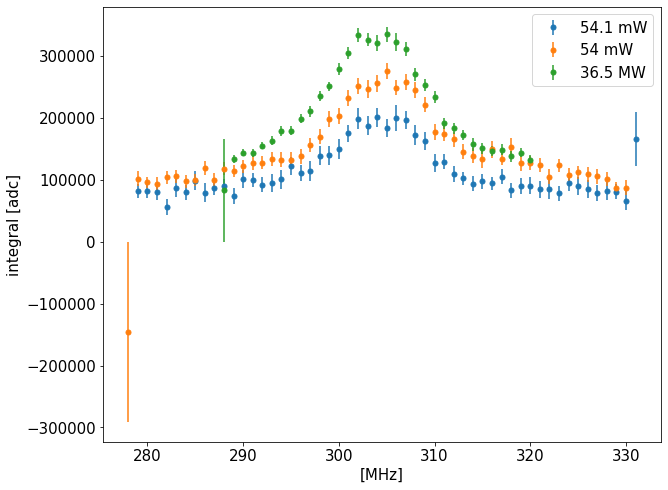

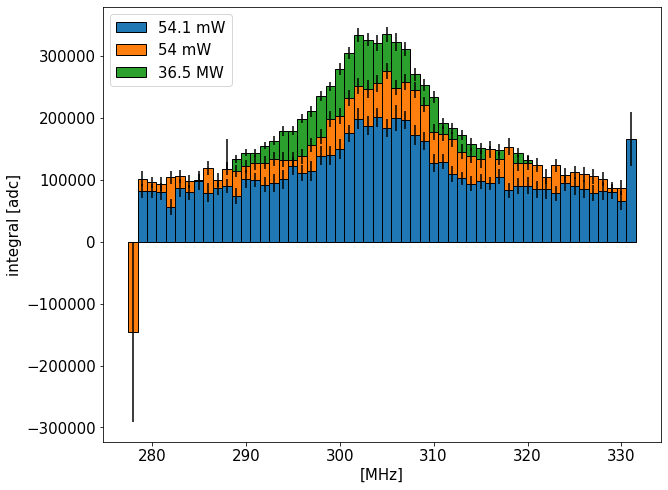

In [6]:
binned_integrals_powers = bin_datasets_laserscan(fname, dset_names_P2F1_scan, powers_P2F1, ch = 1, laser_scanned = 'laser 1')
figures = plot_binned_datasets_laserscan(binned_integrals_powers, powers_P2F1)

figures['scan histogram'][0].savefig('R2 F1 saturation scan histogram.png', dpi=300)

## Check effect of detection (R0 F1) double pass with prism

Manually blocking/unblocking the double pass prismreturn path during measurements to quantify effect.

| desc | value | 
|-----|-----|
|rot cooling pol type | square wave, off |
|rot cooling pol switch | 1.69 Mhz|
|detection pol type | resonant, cont. |
|detection pol switch | 1.562 MHz | 
|detection power | 27 mW |
|rot cooling power | 0 mW | 

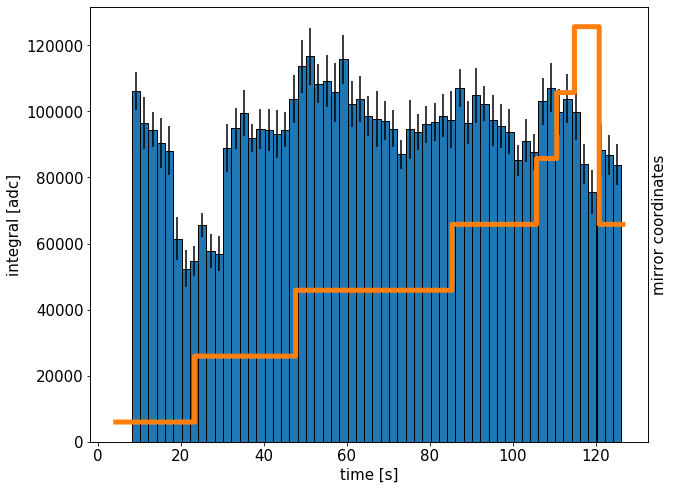

In [7]:
ch = 1

dset_name = "1582764728 check_detection_prism_gain_R0F1"
pxie, pxie_time, laserlock, wavelength, mirror = load_measurement_data(fname, dset_name)
integrals = [-np.trapz(pxie[idx][250:1900,ch]-np.mean(pxie[idx][50:200, ch])) for idx in range(1, max(pxie_time.keys())+1)]

bin_width = 10
binned_integrals = np.array(integrals[:len(integrals)//bin_width*bin_width]).reshape(-1, bin_width)
binned_means = binned_integrals.mean(axis = 1)
binned_errors = binned_integrals.std(axis = 1)/np.sqrt(bin_width)

t = np.array([pxie_time[idx] for idx in range(1, max(pxie_time.keys())+1)])
binned_time = np.array(t[:len(t)//bin_width*bin_width]).reshape(-1, bin_width).mean(axis = 1)

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(binned_time, binned_means, yerr = binned_errors, width = np.diff(binned_time).mean(), edgecolor = 'k')
ax1 = ax.twinx()
ax1.step(mirror['time'], mirror['x']+mirror['y'], 'C1', lw =5 )
ax1.set_yticks([])
              
ax.set_xlabel('time [s]')
ax.set_ylabel('integral [adc]')
ax1.set_ylabel('mirror coordinates')

set_fontsize(ax, 15)
set_fontsize(ax1, 15)

When the return path was blocked was not recorded so it's not possible from the data to say when the double pass detection was active or not unfortunately.